In [ ]:
from nltk.corpus import reuters
import nltk
nltk.download('reuters')
!unzip /root/nltk_data/corpora/reuters.zip -d /root/nltk_data/corpora

[nltk_data] Downloading package reuters to /root/nltk_data...


Streaming output truncated to the last 5000 lines.
  inflating: /root/nltk_data/corpora/reuters/training/2231  
  inflating: /root/nltk_data/corpora/reuters/training/2232  
  inflating: /root/nltk_data/corpora/reuters/training/2234  
  inflating: /root/nltk_data/corpora/reuters/training/2236  
  inflating: /root/nltk_data/corpora/reuters/training/2237  
  inflating: /root/nltk_data/corpora/reuters/training/2238  
  inflating: /root/nltk_data/corpora/reuters/training/2239  
  inflating: /root/nltk_data/corpora/reuters/training/2240  
  inflating: /root/nltk_data/corpora/reuters/training/2244  
  inflating: /root/nltk_data/corpora/reuters/training/2246  
  inflating: /root/nltk_data/corpora/reuters/training/2247  
  inflating: /root/nltk_data/corpora/reuters/training/2249  
  inflating: /root/nltk_data/corpora/reuters/training/225  
  inflating: /root/nltk_data/corpora/reuters/training/2251  
  inflating: /root/nltk_data/corpora/reuters/training/2252  
  inflating: /root/nltk_data/corpor

In [ ]:
from nltk.corpus import reuters
len(reuters.categories())

90

In [ ]:
classes=['acq','corn','crude', 'earn', 'grain', 'interest', 'money-fx', 'ship', 'trade', 'wheat']
document_id_list=[]

In [ ]:
for classs in classes:
  current_class_document_id_list=reuters.fileids(classs);
  document_id_list.extend(current_class_document_id_list)
distinct_document_id_list=list(set(document_id_list))

In [ ]:
category_map={'acq':0,'corn':1,'crude':2, 'earn':3, 'grain':4, 'interest':5, 'money-fx':6, 'ship':7, 'trade':8, 'wheat':9}
processed_doc_ids=[]
processed_label_ids=[]

In [ ]:
for i in range(len(distinct_document_id_list)):
  if len(reuters.categories(distinct_document_id_list[i]))==1:
    processed_label_ids.append(category_map[reuters.categories(distinct_document_id_list[i])[0]])
    processed_doc_ids.append(distinct_document_id_list[i])
  else:
    count=0
    for category in reuters.categories(distinct_document_id_list[i]):
      if category in classes:
        count+=1
        required_category=category
    if count == 1:  
      processed_doc_ids.append(distinct_document_id_list[i])
      processed_label_ids.append(category_map[required_category])

In [ ]:
def verify_preprocessing(processed_doc_ids):
  sum=0
  for id in processed_doc_ids:
    count=0
    for category in reuters.categories(id):
        if category in classes:
          count+=1
    if count>1:
      print('Not working')

In [ ]:
verify_preprocessing(processed_doc_ids)
print(len(processed_doc_ids))

8201


In [ ]:
import nltk
nltk.download('punkt')
documents=reuters.paras(fileids=processed_doc_ids)
words_in_dataset=[]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
for j in range(len(documents)):
  words_in_current_document=documents[j]
  for i in range(len(words_in_current_document)):
    words_in_dataset.extend(words_in_current_document[i])

In [ ]:
import nltk
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
def stem_tokens(tokens):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))  
    return stemmed
document_ids_terms = {}

In [ ]:
i=0
for document_id in processed_doc_ids: 
  document_ids_terms[document_id]=[]
  for para in reuters.paras(fileids=[document_id])[0]:
    document_ids_terms[document_id].extend(stem_tokens(para))
  i+=1
sum=0
for abc in document_ids_terms:
  sum+=len(abc)
print(sum)

100736


In [ ]:
print(len(set(processed_doc_ids)))
print(len(processed_doc_ids))
print(len(processed_doc_ids))

8201
8201
8201


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_matrix = TfidfVectorizer(stop_words='english', input='content')
tfs = tfidf_matrix.fit_transform([" ".join(l) for l in document_ids_terms.values()])

In [ ]:
tfs.shape

(8201, 19977)

In [ ]:
tfs

<8201x19977 sparse matrix of type '<class 'numpy.float64'>'
	with 395007 stored elements in Compressed Sparse Row format>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random as rd

In [ ]:
class KMeans:

    def __init__(self, n_clusters,n_iter):
        self.data = pd.DataFrame()
        self.n_clusters = n_clusters
        self.centroids = pd.DataFrame()
        self.clusters = np.ndarray(1)
        self.old_centroids = pd.DataFrame()
        self.verbose = False
        self.predictions = list()
        self.n_iter=n_iter

    def train(self, df, verbose):
        self.verbose = verbose
        self.data = df.copy(deep=True)
        self.clusters = np.zeros(len(self.data))
        if 'species' in self.data.columns:
            self.data.drop('species', axis=1, inplace=True)

        unique_rows = self.data.drop_duplicates()
        unique_rows.reset_index(drop=True, inplace=True)
        self.centroids = unique_rows.sample(n=self.n_clusters)
        self.centroids.reset_index(drop=True, inplace=True)
        if self.verbose:
            print("\nRandomly initiated centroids:")
            print(self.centroids)

        self.old_centroids = pd.DataFrame(np.zeros(shape=(self.n_clusters, self.data.shape[1])),
                                          columns=self.data.columns)
        while not self.old_centroids.equals(self.centroids) and self.n_iter!=0:
            if self.verbose:
                time.sleep(3)

            self.old_centroids = self.centroids.copy(deep=True)

            for row_i in range(0, len(self.data)):
                distances = list()
                point = self.data.iloc[row_i]

                for row_c in range(0, len(self.centroids)):
                    centroid = self.centroids.iloc[row_c]
                    distances.append(np.linalg.norm(point - centroid))

                self.clusters[row_i] = np.argmin(distances)
            for cls in range(0, self.n_clusters):

                cls_idx = np.where(self.clusters == cls)[0]

                if len(cls_idx) == 0:
                    self.centroids.loc[cls] = self.old_centroids.loc[cls]
                else:
                    self.centroids.loc[cls] = self.data.iloc[cls_idx].mean()
                    
                if self.verbose:
                    print("\nRow indices belonging to cluster {}: [n={}]".format(cls, len(cls_idx)))
                    print(cls_idx)

            if self.verbose:
                print("\nOld centroids:")
                print(self.old_centroids)
                print("New centroids:")
                print(self.centroids)
            self.n_iter-=1

In [ ]:
number_of_clusters = 10
kmeans = KMeans(n_clusters=number_of_clusters,n_iter=100)
kmeans.train(df=pd.DataFrame(tfs.toarray()), verbose=False)

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0).fit(tfs)
kmeans.labels_

array([2, 4, 2, ..., 5, 5, 6], dtype=int32)

In [ ]:
print(len(kmeans.labels_))
print(len(processed_label_ids))

8201
8201


In [ ]:
! pip install scikit-learn==0.22.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.1 MB 13.6 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.22.2 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.22.2 which is incompatible.


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.utils.linear_assignment_ import linear_assignment
def _make_cost_m(cm):
    s = np.max(cm)
    return (- cm + s)
def align_predicted_and_correct_cluster_labesl(correct_clusters,predicted_clusters):
  cm=confusion_matrix(correct_clusters,predicted_clusters)
  print(cm)
  print(np.trace(cm) / np.sum(cm))
  indexes = linear_assignment(_make_cost_m(cm))
  js = [e[1] for e in sorted(indexes, key=lambda x: x[0])]
  cm2 = cm[:, js]
  print(cm2)
  print(np.trace(cm2) / np.sum(cm2))
  return indexes

/usr/local/lib/python3.7/dist-packages/sklearn/utils/linear_assignment_.py:22: FutureWarning: The linear_assignment_ module is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


In [ ]:
indexes=align_predicted_and_correct_cluster_labesl(processed_label_ids,kmeans.labels_)

[[   1   16 1724    0    0   30    3    0  518   27]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    9   88    0    0    0  353    0    1    7]
 [ 822    0  209  508  709   21    3  799  292  567]
 [   0   16   93    0    0    0    1    0    0    3]
 [   0   38   17    0    0  225    1    0    0    9]
 [   0  278   35    0    0  169    0    0    0   17]
 [   0    4  157    0    0    0    2    0    0    3]
 [   0  309   18    0    0    1    2    0    0   95]
 [   0    0    1    0    0    0    0    0    0    0]]
0.10023167906352884
[[1724  518    3    1    0   30   16    0   27    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [  88    1  353    0    0    0    9    0    7    0]
 [ 209  292    3  822  799   21    0  508  567  709]
 [  93    0    1    0    0    0   16    0    3    0]
 [  17    0    1    0    0  225   38    0    9    0]
 [  35    0    0    0    0  169  278    0   17    0]
 [ 157    0    2    0    0    0    4    0    3    0]
 [  18    0    2    0    

/usr/local/lib/python3.7/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


In [ ]:
cfnmatrix=np.array([[2239,    0,    6,    1,   45,   16,   12,    0,    0,    0],
 [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
 [  66,    0,  380,    0,    5,    0,    6,    0,    1,    0],
 [ 165,  806,    4,  944,  865,   17,    2,  484,  132,  511],
 [  94,    0,    1,    0,    6,    0,   12,    0,    0,    0],
 [  16,   0,    1 ,   0,    1,  225,   41,   0,    6,    0],
 [  30,    0 ,   0,    0,    5,  103,  349,    0,   12,    0],
 [ 156,    0,    2,    0,    3,    0,    5,    0,    0,    0],
 [  19,    0,    3,    0,   21,    1,  311,    0,   70,    0],
 [   1,   0,    0 ,   0,    0,    0,    0,    0,    0,    0],])

In [ ]:
row_sum=0
column_sum=0
for j in range(10):
  row_sum+=cfnmatrix[0][j]
print(row_sum)
for j in range(10):
  column_sum+=cfnmatrix[j][0]
column_sum-=cfnmatrix[0][0]
print(column_sum)
cfnmatrix.sum()-row_sum-column_sum

2319
547


5335

In [ ]:
def TP_TN_FP_FN(confusion_matrix,n):
  table=pd.DataFrame(columns=['Class','True Positive','True Negative','False Positive','False Negative'])
  for i in range(10):
    total_sum=np.sum(confusion_matrix)
    true_positive=confusion_matrix[i][i]
    false_postive=0
    for j in range(10):
      if j!=i:
        false_postive+=confusion_matrix[j][i]
    false_negative=0
    for j in range(10):
      if j!=i:
        false_negative+=confusion_matrix[i][j]
    row_sum=0
    column_sum=0
    for j in range(10):
      row_sum+=confusion_matrix[i][j]
    for j in range(10):
      column_sum+=confusion_matrix[j][i]
    column_sum-=confusion_matrix[i][i]
    true_negative=total_sum-row_sum-column_sum
    
    table.loc[len(table.index)] = [i,true_positive,true_negative,false_postive,false_negative]
  return table

In [ ]:
dataframe=TP_TN_FP_FN(cfnmatrix,10)
dataframe

,Class,True Positive,True Negative,False Positive,False Negative
0,0,2239,5335,547,80
1,1,0,7395,806,0
2,2,380,7726,17,78
3,3,944,4270,1,2986
4,4,6,7143,945,107
5,5,225,7774,137,65
6,6,349,7313,389,150
7,7,0,7551,484,166
8,8,70,7625,151,355
9,9,0,7689,511,1


In [ ]:
transformation_dictionary={}
for abc in indexes:
  transformation_dictionary[abc[0]]=abc[1]

In [ ]:
transformation_dictionary

{0: 2, 1: 8, 2: 6, 3: 0, 4: 7, 5: 5, 6: 1, 7: 3, 8: 9, 9: 4}

In [ ]:
aligned_label_ids=[]
for processed_label_id in processed_label_ids:
  processed_label_id
  aligned_label_ids.append(transformation_dictionary[processed_label_id])

In [ ]:
matrix = classification_report(aligned_label_ids,kmeans.labels_)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           0       1.00      0.21      0.35      3930
           1       0.41      0.56      0.48       499
           2       0.74      0.74      0.74      2319
           3       0.00      0.00      0.00       166
           4       0.00      0.00      0.00         1
           5       0.50      0.78      0.61       290
           6       0.97      0.77      0.86       458
           7       0.00      0.00      0.00       113
           8       0.00      0.00      0.00         0
           9       0.13      0.22      0.16       425

    accuracy                           0.43      8201
   macro avg       0.38      0.33      0.32      8201
weighted avg       0.79      0.43      0.48      8201



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [ ]:
import numpy as np
from sklearn import metrics
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score
def show_metrics(correct_clusters,predicted_clusters):
    contingency_matrix = metrics.cluster.contingency_matrix(correct_clusters, predicted_clusters)
    purity_score= np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)
    print('Purity Score',purity_score)
    print('Normalized Mutual Information',normalized_mutual_info_score(correct_clusters,predicted_clusters))
    print('Rand Index',adjusted_rand_score(correct_clusters,predicted_clusters))

In [ ]:
show_metrics(aligned_label_ids,kmeans.labels_)

Purity Score 0.7967321058407512
Normalized Mutual Information 0.4802054543711211
Rand Index 0.2509253073112719


In [ ]:
classes_to_be_selected=['crude', 'grain', 'interest']

In [ ]:
document_ids=[]
for classs in classes_to_be_selected:
  current_class_document_ids=reuters.fileids(classs);
  document_ids.extend(current_class_document_ids)

In [ ]:
uniqueDocumentIds=list(set(document_ids))

In [ ]:
category_labels={'crude':0,'grain':1,'interest':2}

In [ ]:
processed_doc_ids=[]
processed_label_ids=[]
for i in range(len(uniqueDocumentIds)):
  if len(reuters.categories(uniqueDocumentIds[i]))==1:
    processed_label_ids.append(category_labels[reuters.categories(uniqueDocumentIds[i])[0]])
    processed_doc_ids.append(uniqueDocumentIds[i])
  else:
    count=0
    for category in reuters.categories(uniqueDocumentIds[i]):
      if category in classes_to_be_selected:
        count+=1
        required_category=category
    if count == 1:  
      processed_doc_ids.append(uniqueDocumentIds[i])
      processed_label_ids.append(category_labels[required_category])

In [ ]:
sum=0
for id in processed_doc_ids:
  count=0
  for category in reuters.categories(id):
      if category in classes_to_be_selected:
        count+=1
  if count>1:
    print('Something is wrong')

In [ ]:
print(len(processed_doc_ids))

1632


In [ ]:
import nltk
nltk.download('punkt')
documents=reuters.paras(fileids=processed_doc_ids)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
import nltk
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
def stem_tokens(tokens):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

In [ ]:
document_ids_terms = {}
i=0
for document_id in processed_doc_ids: 
  document_ids_terms[document_id]=[]
  for para in reuters.paras(fileids=[document_id])[0]:
    document_ids_terms[document_id].extend(stem_tokens(para))
  i+=1

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english', input='content')
tfs = tfidf.fit_transform([" ".join(l) for l in document_ids_terms.values()])

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy as sp
from sklearn import datasets
from numpy import linalg as LA
from sklearn.metrics.pairwise import pairwise_distances
import sys
def hierarchical_clustering(data,linkage,no_of_clusters):  
    color = ['r','g','b']
    initial_distances = pairwise_distances(data,metric='euclidean')
    np.fill_diagonal(initial_distances,sys.maxsize)
    clusters = find_clusters(initial_distances,linkage) 
    

    iteration_number = initial_distances.shape[0] - no_of_clusters
    clusters_to_plot = clusters[iteration_number]
    arr = np.unique(clusters_to_plot)
    
    indices_to_plot = []
    fig = plt.figure()
    fig.suptitle('Scatter Plot for clusters')
    ax = fig.add_subplot(1,1,1)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    for x in np.nditer(arr):
        indices_to_plot.append(np.where(clusters_to_plot==x))
    p=0
    
    print(clusters_to_plot)
    for i in range(0,len(indices_to_plot)):
        for j in np.nditer(indices_to_plot[i]):
               ax.scatter(data[j,0],data[j,1], c= color[p])
        p = p + 1
        
    plt.show()
    
def find_clusters(input,linkage):
    clusters = {}
    row_index = -1
    col_index = -1
    array = []
    

    for n in range(input.shape[0]):
        array.append(n)
        
    clusters[0] = array.copy()
    for k in range(1, input.shape[0]):
        min_val = sys.maxsize
        
        for i in range(0, input.shape[0]):
            for j in range(0, input.shape[1]):
                if(input[i][j]<=min_val):
                    min_val = input[i][j]
                    row_index = i
                    col_index = j
                    

        if(linkage == "single" or linkage =="Single"):
            for i in range(0,input.shape[0]):
                if(i != col_index):
                    temp = min(input[col_index][i],input[row_index][i])
                    input[col_index][i] = temp
                    input[i][col_index] = temp
        elif(linkage=="Complete" or linkage == "complete"):
             for i in range(0,input.shape[0]):
                if(i != col_index and i!=row_index):
                    temp = min(input[col_index][i],input[row_index][i])
                    input[col_index][i] = temp
                    input[i][col_index] = temp
        elif(linkage=="Average" or linkage == "average"):
             for i in range(0,input.shape[0]):
                if(i != col_index and i!=row_index):
                    temp = (input[col_index][i]+input[row_index][i])/2
                    input[col_index][i] = temp
                    input[i][col_index] = temp
        for i in range (0,input.shape[0]):
            input[row_index][i] = sys.maxsize
            input[i][row_index] = sys.maxsize
       
        minimum = min(row_index,col_index)
        maximum = max(row_index,col_index)
        for n in range(len(array)):
            if(array[n]==maximum):
                array[n] = minimum
        clusters[k] = array.copy()
        
    return clusters

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

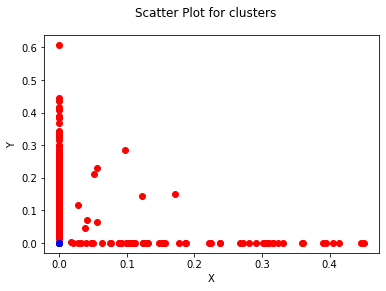

In [ ]:
clusters=hierarchical_clustering(tfs,"single",3)

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.cluster import AgglomerativeClustering
def perform_clustering_generate_report(cluster_type,tfs):
  model = AgglomerativeClustering(linkage=cluster_type).fit(tfs.toarray(),)
  indexes=align_predicted_and_correct_cluster_labesl(processed_label_ids,model.labels_)  
  transformation_dictionary={}
  aligned_label_ids=[]
  for abc in indexes:
    transformation_dictionary[abc[0]]=abc[1]
  for processed_label_id in processed_label_ids:
    aligned_label_ids.append(transformation_dictionary[processed_label_id])
  matrix = classification_report(aligned_label_ids,model.labels_)
  print('Classification report : \n',matrix)
  print('Rand Index',adjusted_rand_score(aligned_label_ids,model.labels_))

In [ ]:
perform_clustering_generate_report('single',tfs)

[[574   1   0]
 [580   0   0]
 [477   0   0]]
0.35171568627450983
[[  1 574   0]
 [  0 580   0]
 [  0 477   0]]
0.3560049019607843
Classification report : 
               precision    recall  f1-score   support

           0       0.36      1.00      0.52       580
           1       1.00      0.00      0.00       575
           2       0.00      0.00      0.00       477

    accuracy                           0.36      1632
   macro avg       0.45      0.33      0.18      1632
weighted avg       0.48      0.36      0.19      1632

Rand Index -6.0790755151145804e-05


/usr/local/lib/python3.7/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Prec

In [ ]:
perform_clustering_generate_report('average',tfs)

[[569   6   0]
 [574   6   0]
 [475   2   0]]
0.35232843137254904
[[  6 569   0]
 [  6 574   0]
 [  2 475   0]]
0.3553921568627451
Classification report : 
               precision    recall  f1-score   support

           0       0.35      0.99      0.52       580
           1       0.43      0.01      0.02       575
           2       0.00      0.00      0.00       477

    accuracy                           0.36      1632
   macro avg       0.26      0.33      0.18      1632
weighted avg       0.28      0.36      0.19      1632

Rand Index -0.000477053714563841


/usr/local/lib/python3.7/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Prec

In [ ]:
perform_clustering_generate_report('complete',tfs)

[[441 134   0]
 [226 354   0]
 [471   6   0]]
0.48713235294117646
[[  0 134 441]
 [  0 354 226]
 [  0   6 471]]
0.5055147058823529
Classification report : 
               precision    recall  f1-score   support

           0       0.41      0.99      0.58       477
           1       0.72      0.61      0.66       580
           2       0.00      0.00      0.00       575

    accuracy                           0.51      1632
   macro avg       0.38      0.53      0.41      1632
weighted avg       0.38      0.51      0.40      1632

Rand Index 0.13342680196442613


/usr/local/lib/python3.7/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Prec

In [ ]:
perform_clustering_generate_report('ward',tfs)

[[ 11 564   0]
 [  1 579   0]
 [411  66   0]]
0.36151960784313725
[[  0 564  11]
 [  0 579   1]
 [  0  66 411]]
0.6066176470588235
Classification report : 
               precision    recall  f1-score   support

           0       0.97      0.86      0.91       477
           1       0.48      1.00      0.65       580
           2       0.00      0.00      0.00       575

    accuracy                           0.61      1632
   macro avg       0.48      0.62      0.52      1632
weighted avg       0.45      0.61      0.50      1632

Rand Index 0.38441377380576197


/usr/local/lib/python3.7/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Prec

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
def plottingDendogram(linkage_type):
  Z = linkage(tfs.toarray(), linkage_type)
  fig = plt.figure(figsize=(25, 10))
  dn = dendrogram(Z)

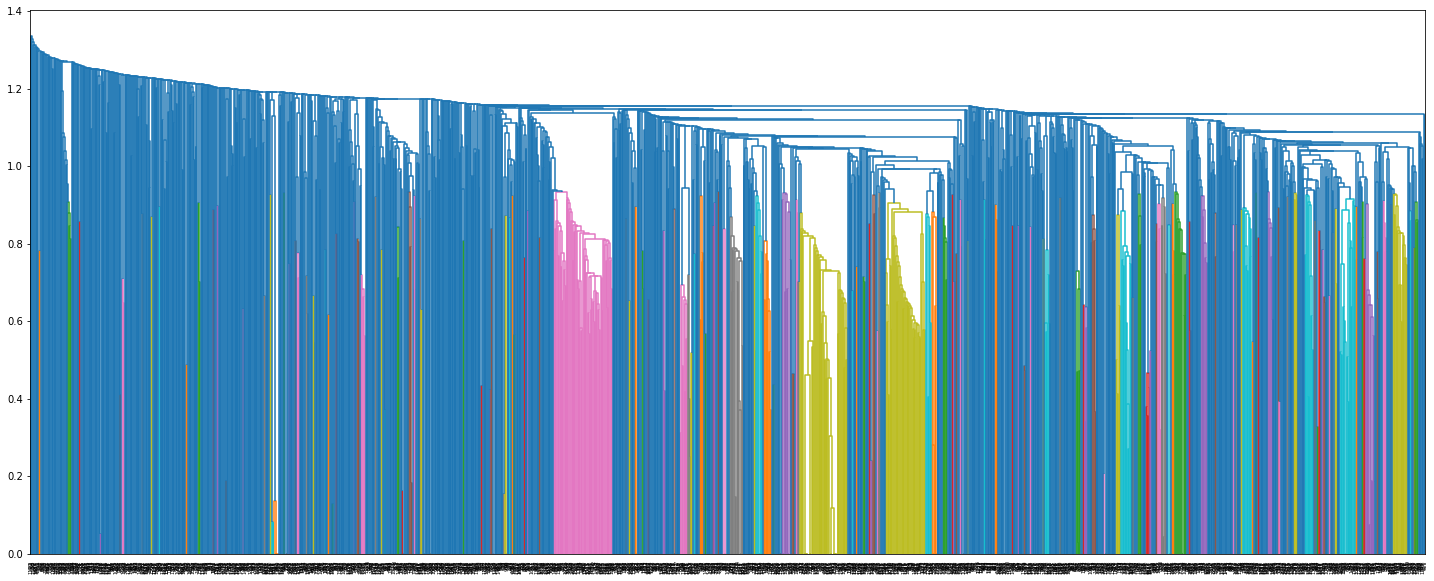

In [ ]:
plottingDendogram('single')

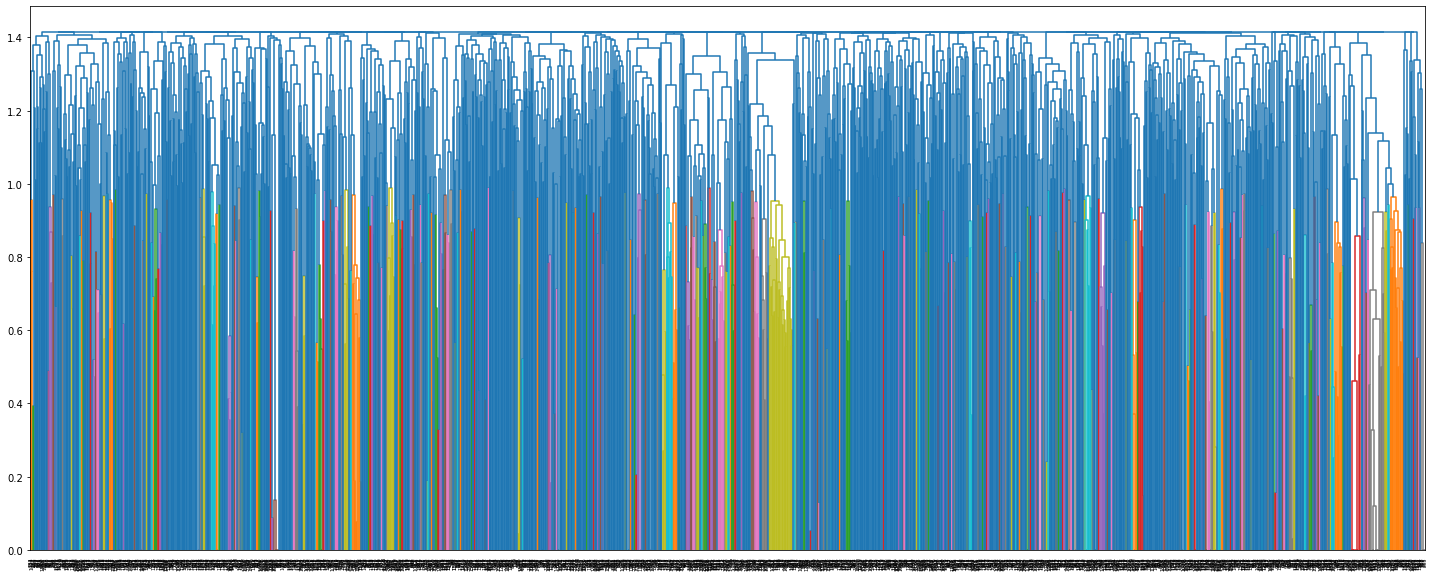

In [ ]:
plottingDendogram('complete')

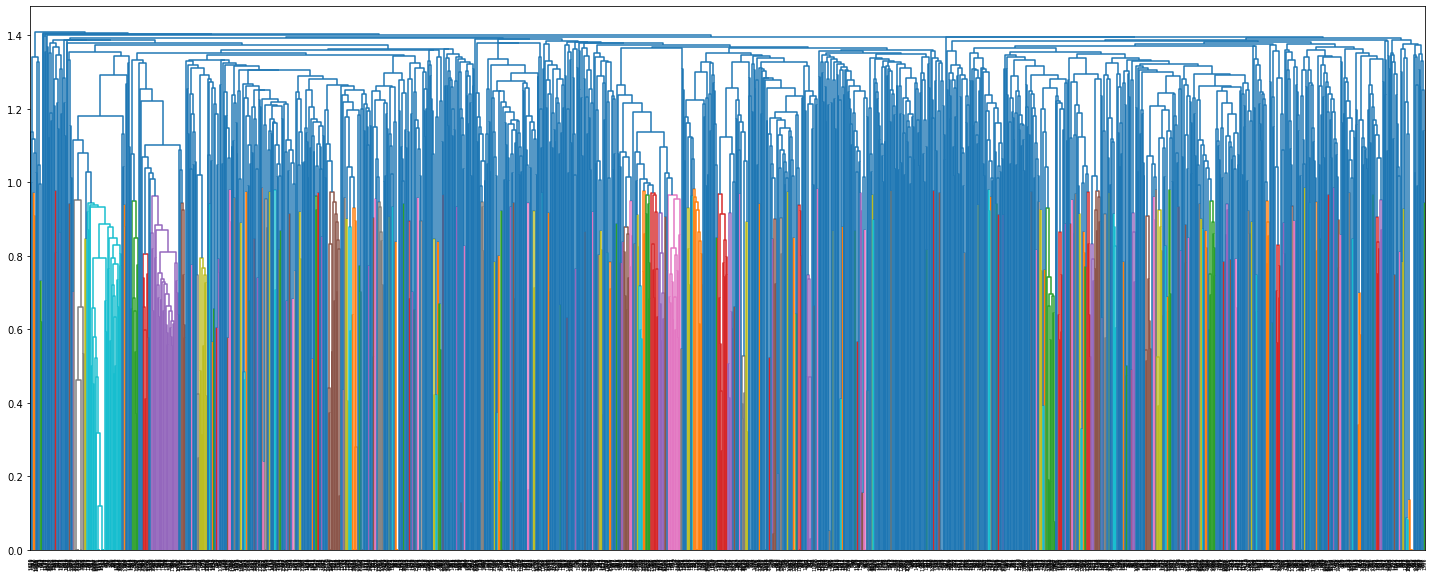

In [ ]:
plottingDendogram('average')

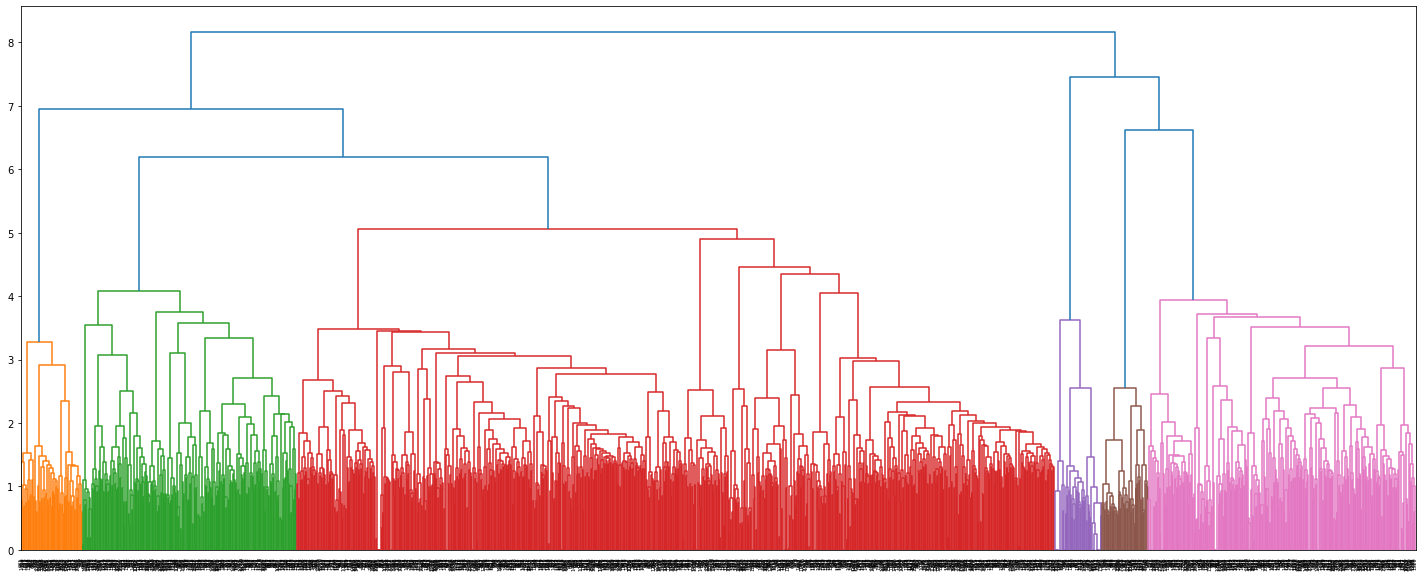

In [ ]:
plottingDendogram('ward')

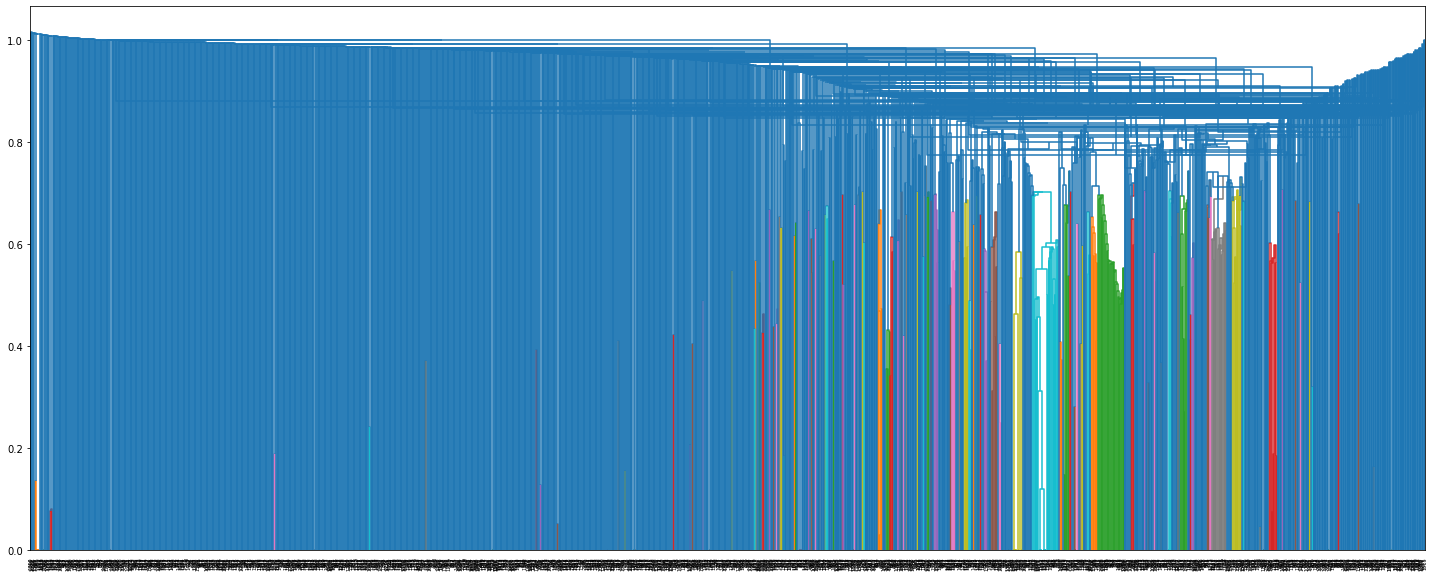

In [ ]:
import sys
sys.setrecursionlimit(10000)
plottingDendogram('centroid')